In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
data=pd.read_csv("C:/Users/chandu/Desktop/Imarticus/imports-85.data",header=None,na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [4]:
data.shape

(205, 26)

In [5]:
data.columns=['symboling','nl','make','fueltype','aspiration','nod','bodystyle','drivewheels','enginelocation','wheelbase','length','width','height','curbweight','enginetype','noc','enginesize','fuelsystem','bore','stroke','cr','horsepower','peakrpm','citympg','highwaympg','price']
data.head(5)

,symboling,nl,make,fueltype,aspiration,nod,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cr,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
data.columns

Index(['symboling', 'nl', 'make', 'fueltype', 'aspiration', 'nod', 'bodystyle',
       'drivewheels', 'enginelocation', 'wheelbase', 'length', 'width',
       'height', 'curbweight', 'enginetype', 'noc', 'enginesize', 'fuelsystem',
       'bore', 'stroke', 'cr', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of      symboling     nl         make fueltype aspiration   nod    bodystyle  \
0            3    NaN  alfa-romero      gas        std   two  convertible   
1            3    NaN  alfa-romero      gas        std   two  convertible   
2            1    NaN  alfa-romero      gas        std   two    hatchback   
3            2  164.0         audi      gas        std  four        sedan   
4            2  164.0         audi      gas        std  four        sedan   
..         ...    ...          ...      ...        ...   ...          ...   
200         -1   95.0        volvo      gas        std  four        sedan   
201         -1   95.0        volvo      gas      turbo  four        sedan   
202         -1   95.0        volvo      gas        std  four        sedan   
203         -1   95.0        volvo   diesel      turbo  four        sedan   
204         -1   95.0        volvo      gas      turbo  four        sedan   

    drivewheels enginelocation  wheelbase  

In [8]:
data.isnull()

,symboling,nl,make,fueltype,aspiration,nod,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cr,horsepower,peakrpm,citympg,highwaympg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

symboling          0
nl                41
make               0
fueltype           0
aspiration         0
nod                2
bodystyle          0
drivewheels        0
enginelocation     0
wheelbase          0
length             0
width              0
height             0
curbweight         0
enginetype         0
noc                0
enginesize         0
fuelsystem         0
bore               4
stroke             4
cr                 0
horsepower         2
peakrpm            2
citympg            0
highwaympg         0
price              4
dtype: int64

In [10]:
# SYMBOLING (Disecrete)

In [11]:
data.symboling.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [12]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='count'>

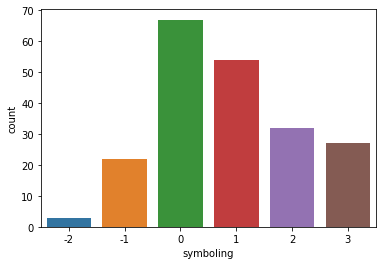

In [13]:
sns.countplot(data.symboling)

In [14]:
# nl (Continuous)

In [16]:
data.nl.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: nl, dtype: float64

In [18]:
data.nl.isnull().sum()

41

In [19]:
data.nl.fillna(data.nl.median(),inplace=True)

In [20]:
data.nl.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a84cf2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a84cf910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a84bcee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a84da070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a84da400>],
 'means': []}

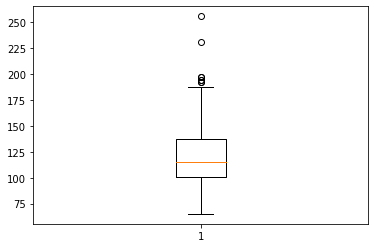

In [21]:
plt.boxplot(data.nl)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

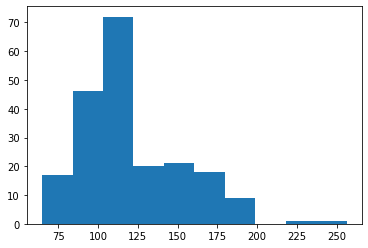

In [22]:
plt.hist(data.nl)

In [24]:
stats.shapiro(data.nl)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

In [25]:
# make(discrete)

In [26]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [27]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

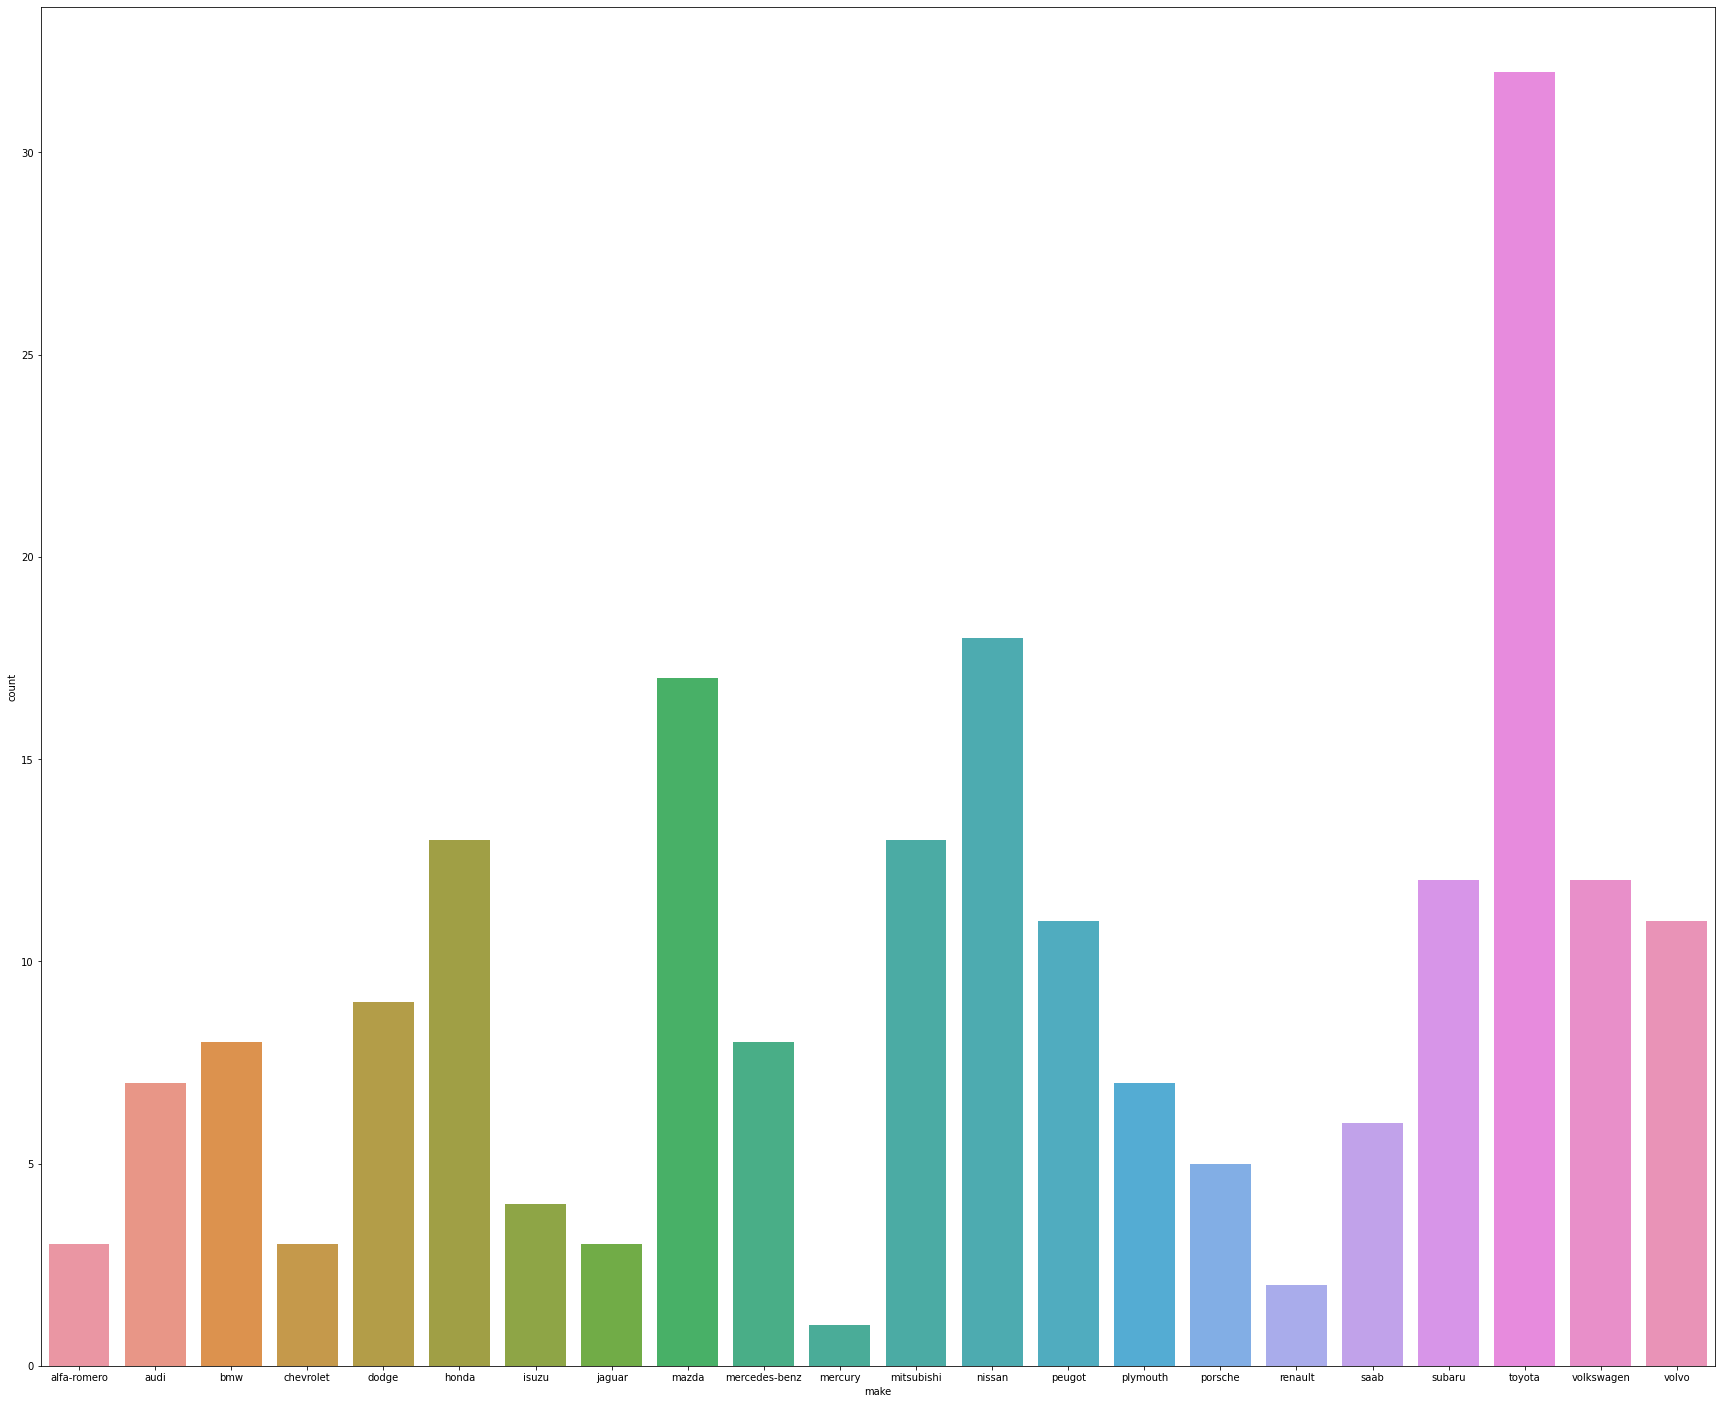

In [28]:
plt.figure(figsize=(30,25))
sns.countplot(data.make)

In [31]:
# fueltype (discrete)

In [32]:
data.fueltype.describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [33]:
data.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltype', ylabel='count'>

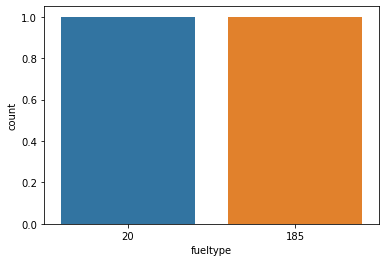

In [34]:
sns.countplot(data.fueltype.value_counts())

In [35]:
# aspiratoin (Discrete)

In [36]:
data.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [37]:
data.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aspiration', ylabel='count'>

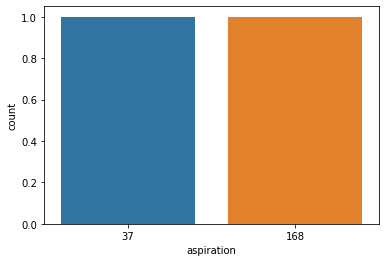

In [38]:
sns.countplot(data.aspiration.value_counts())

In [39]:
# nod (Discrete)

In [40]:
data.nod.describe()

count      203
unique       2
top       four
freq       114
Name: nod, dtype: object

In [41]:
data.nod.isnull().sum()

2

In [44]:
data.nod.fillna('four',inplace=True)

In [45]:
data.nod.isnull().sum()

0

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nod', ylabel='count'>

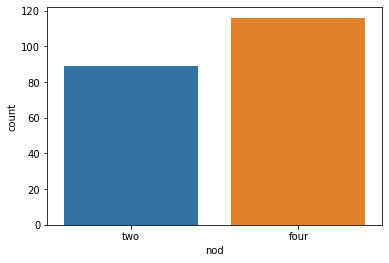

In [46]:
sns.countplot(data.nod)

In [47]:
# bodystyle (Discrete)

In [48]:
data.bodystyle.describe()

count       205
unique        5
top       sedan
freq         96
Name: bodystyle, dtype: object

In [49]:
data.bodystyle.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: bodystyle, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bodystyle', ylabel='count'>

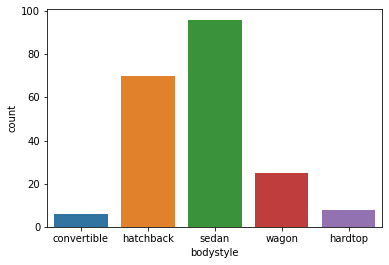

In [50]:
sns.countplot(data.bodystyle)

In [51]:
# drivewheels (Discrete)

In [52]:
data.drivewheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: drivewheels, dtype: object

In [54]:
data.drivewheels.isnull().sum()

0

In [56]:
data.drivewheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheels, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivewheels', ylabel='count'>

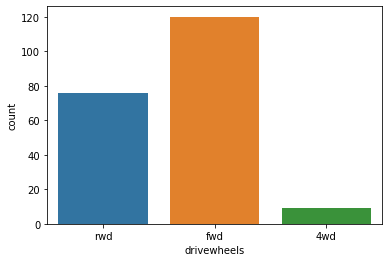

In [57]:
sns.countplot(data.drivewheels)

In [58]:
# enginelocation (Discrete)

In [59]:
data.enginelocation.describe()

count       205
unique        2
top       front
freq        202
Name: enginelocation, dtype: object

In [60]:
data.enginelocation.isnull().sum()

0

In [61]:
data.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

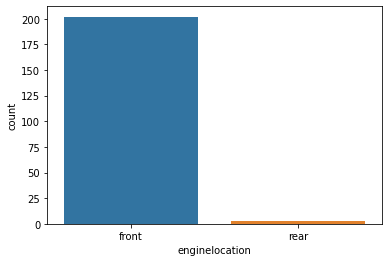

In [62]:
sns.countplot(data.enginelocation)

In [63]:
# wheelbase (Continuous)

In [64]:
data.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

In [65]:
data.wheelbase.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a88ba700>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a88bae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a88ba370>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a88c5580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a88c5910>],
 'means': []}

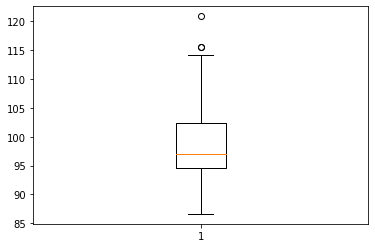

In [66]:
plt.boxplot(data.wheelbase)

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

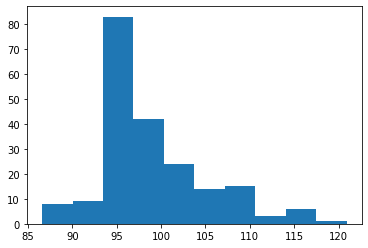

In [67]:
plt.hist(data.wheelbase)

In [68]:
stats.shapiro(data.wheelbase)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

In [69]:
# length (Continuous)

In [70]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [71]:
data.length.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a89a3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a89b4430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a89a38b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a89b4b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a89b4ee0>],
 'means': []}

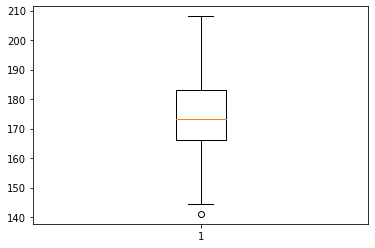

In [72]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

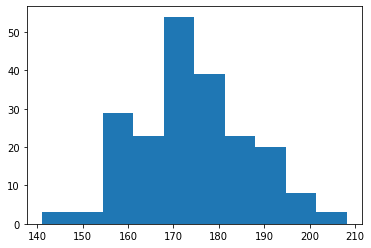

In [73]:
plt.hist(data.length)

In [74]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

In [75]:
# width (Continuous)

In [76]:
data.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [77]:
data.width.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8a9a0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8a9a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8a8acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8a9aee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8aa52b0>],
 'means': []}

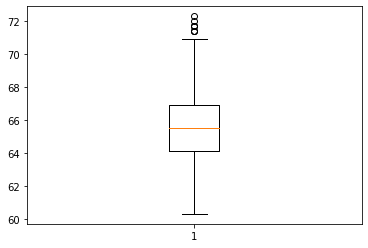

In [78]:
plt.boxplot(data.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

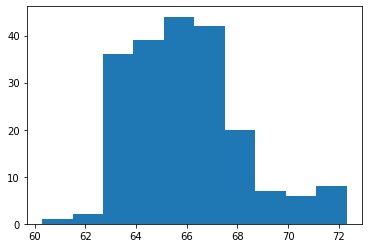

In [79]:
plt.hist(data.width)

In [80]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

In [81]:
# height (Continuous)

In [82]:
data.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [83]:
data.height.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8b79400>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8b79b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8b79040>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8b83280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8b83610>],
 'means': []}

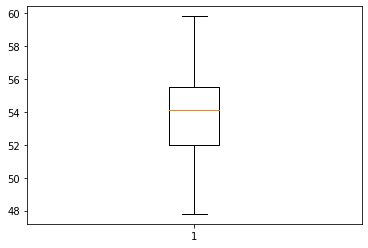

In [84]:
plt.boxplot(data.height)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

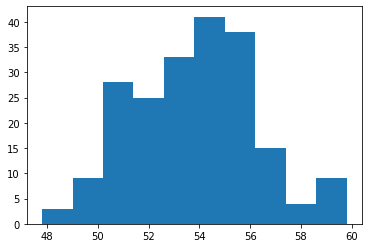

In [85]:
plt.hist(data.height)

In [86]:
# curbweight (Continuous)

In [87]:
data.curbweight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

In [88]:
data.curbweight.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8c5ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8c6b4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8c5aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8c6bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8c6bfa0>],
 'means': []}

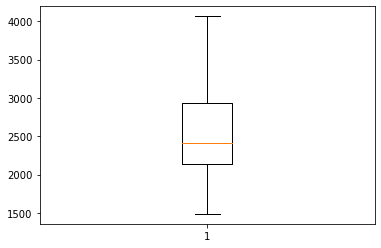

In [90]:
plt.boxplot(data.curbweight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

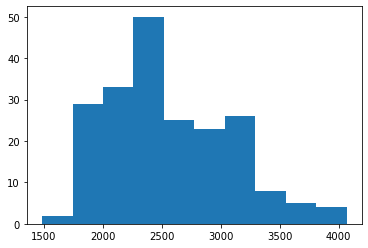

In [91]:
plt.hist(data.curbweight)

In [92]:
stats.shapiro(data.curbweight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

In [93]:
# enginetype (Discrete)

In [94]:
data.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [95]:
data.enginetype.isnull().sum()

0

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginetype', ylabel='count'>

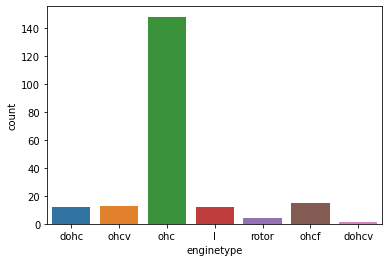

In [96]:
sns.countplot(data.enginetype)

In [97]:
# noc (Discrete)

In [98]:
data.noc.describe()

count      205
unique       7
top       four
freq       159
Name: noc, dtype: object

In [99]:
data.noc.isnull().sum()

0

In [100]:
data.noc.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: noc, dtype: int64

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='noc', ylabel='count'>

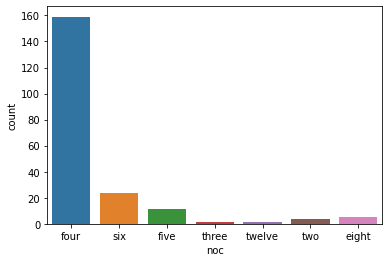

In [101]:
sns.countplot(data.noc)

In [102]:
# stroke (Continuous)

In [103]:
data.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [104]:
data.stroke.isnull().sum()

4

In [105]:
data.stroke.fillna(data.stroke.median(),inplace=True)

In [106]:
data.stroke.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8e16fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8e24730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8e16d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8e24d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8e31100>],
 'means': []}

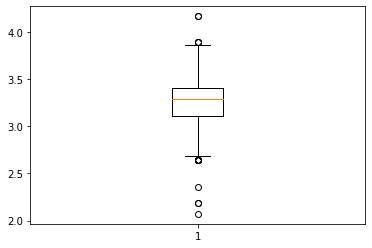

In [107]:
plt.boxplot(data.stroke)

In [110]:
q3=data.stroke.quantile(0.75)
q1=data.stroke.quantile(0.25)
iqr=q3-q1

In [111]:
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)

In [112]:
data[(data.stroke<UE)&(data.stroke>LE)]

,symboling,nl,make,fueltype,aspiration,nod,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cr,horsepower,peakrpm,citympg,highwaympg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [114]:
data.stroke[data.stroke>UE]=UE

C:\Users\chandu\AppData\Local\Temp/ipykernel_8740/2497038561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.stroke[data.stroke>UE]=UE


In [115]:
data.stroke[data.stroke<LE]=LE

C:\Users\chandu\AppData\Local\Temp/ipykernel_8740/1604507181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.stroke[data.stroke<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8ef06a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8ef0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8ef0310>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8efb520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8efb910>],
 'means': []}

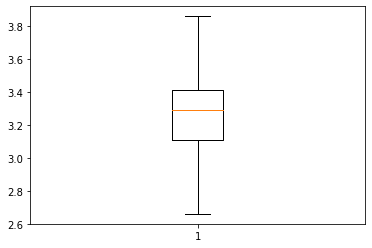

In [116]:
plt.boxplot(data.stroke)

(array([18.,  3.,  3., 31., 36., 28., 51., 21.,  5.,  9.]),
 array([2.66, 2.78, 2.9 , 3.02, 3.14, 3.26, 3.38, 3.5 , 3.62, 3.74, 3.86]),
 <BarContainer object of 10 artists>)

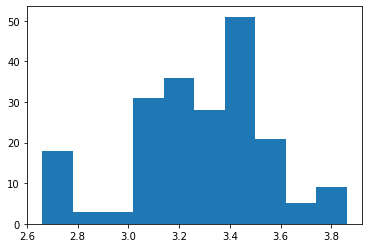

In [117]:
plt.hist(data.stroke)

In [118]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9504072666168213, pvalue=1.5814290463822545e-06)

In [119]:
# horsepower (Continuous)

In [120]:
data.horsepower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [121]:
data.horsepower.isnull().sum()

2

In [122]:
data.horsepower.fillna(data.horsepower.median(),inplace=True)

In [123]:
data.horsepower.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8fcf580>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8fcfca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8fcf1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8fd8400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a8fd8790>],
 'means': []}

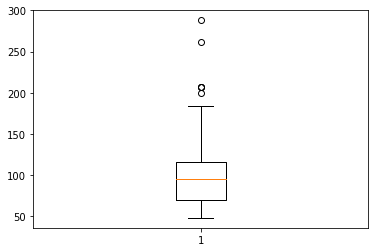

In [124]:
plt.boxplot(data.horsepower)

(array([55., 51., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

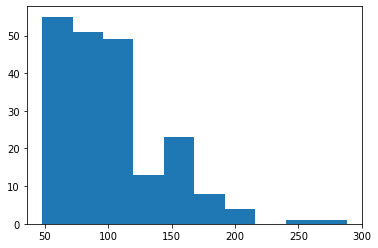

In [125]:
plt.hist(data.horsepower)

In [126]:
stats.shapiro(data.horsepower)

ShapiroResult(statistic=0.8840506672859192, pvalue=1.8387607408909545e-11)

In [130]:
data.shape

(205, 26)

In [131]:
train=data.iloc[:164]
train.shape
train

,symboling,nl,make,fueltype,aspiration,nod,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cr,horsepower,peakrpm,citympg,highwaympg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,91.0,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56.0,4500.0,38,47,7788.0
160,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,38,47,7738.0
161,0,91.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,8358.0
162,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,9258.0


In [132]:
test=data.iloc[164:]
test.shape
test

,symboling,nl,make,fueltype,aspiration,nod,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cr,horsepower,peakrpm,citympg,highwaympg,price
164,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,29,34,8238.0
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0
167,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,8449.0
168,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9639.0
169,2,134.0,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9989.0
170,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0
171,2,134.0,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11549.0
172,2,134.0,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,17669.0
173,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,29,34,8948.0


In [133]:
import statsmodels.api as sm
train_x = train.symboling
train_y = train.citympg
train_x=sm.add_constant(train_x)
model = sm.OLS(train_y,train_x).fit()
model.summary() 

C:\Users\chandu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.670
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.104
Time:                        11:18:03   Log-Likelihood:                -547.15
No. Observations:                 164   AIC:                             1098.
Df Residuals:                     162   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0356      0.695     37.488      0.000      24.664      27.407
symboling     -0.7870      0.482     -1.634      0.104      -1.738       0.164
==============================================================================
Omnibus:                       14.568   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.870
Skew:                           0.679   Prob(JB):                     0.000358
Kurtosis:                       3.692   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""